In [2]:
import pandas as pd
df = pd.read_csv('realEstate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.drop(['X2 house age'],axis=1,inplace=True)


In [6]:
df

,No,X1 transaction date,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,2013.000,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,104.81010,5,24.96674,121.54067,52.5


In [7]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

#### Read and store the features “X2=the house age” of data in X and output variable in Y "house price of unit area"

In [8]:
new_df = pd.read_csv('realEstate.csv')
X = new_df['X2 house age']
Y = df['Y house price of unit area']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [12]:
X_train

376    14.7
118    25.3
43     34.4
120    13.3
324    12.4
       ... 
200    17.4
144    11.9
251    31.7
411    18.8
102     1.1
Name: X2 house age, Length: 331, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
LR = LinearRegression()
LR.fit(X_train[:,None],Y_train[:,None])


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


LinearRegression()

In [ ]:
m = LR.coef_
c = LR.intercept_
m,c

#### Equation of line
> y = -0.23x + 41.95

In [19]:
result = LR.predict(X_test[:,None])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [16]:
score = LR.score(X_test[:,None],Y_test[:,None])
score

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


0.08255875371083743

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(Y_test,result)

162.526116447348

In [23]:
r2_score(Y_test,result)

0.08255875371083743

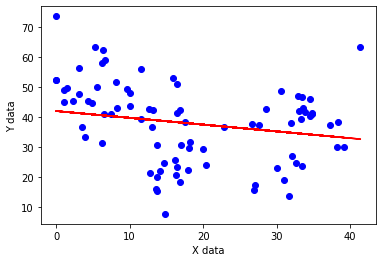

In [28]:
import matplotlib.pyplot as plt
plt.scatter(X_test,Y_test,color="blue")
plt.plot(X_test,result,color="red")
plt.xlabel("X data")
plt.ylabel("Y data")
plt.show()

In [ ]:
df.drop(['Y house price of unit area'],axis=1,inplace=True)
for col in df.columns:
    X = df[col][:,None]
    Y = Y[:,None]
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
    LR = LinearRegression()
    LR.fit(X_train,Y_train)
    result = LR.predict(X_test)
    mse = mean_squared_error(Y_test,result)
    r2 = r2_score(Y_test,result)
    
    
    
    